## Library Imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# To read dataset from byte format
from scipy.io import arff

# Make a request from AWS to get dataset
from urllib import request

# Dataset Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Dimensionality Reduction For Visualization
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

# Inbuilt Perceptron Implementation for Comparison
from sklearn.linear_model import Perceptron

# Divide dataset into different groups for validation and corss validation
from sklearn.model_selection import StratifiedKFold

# To generate classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

# To get accuracy for inbuilt implementation
from sklearn.metrics import accuracy_score

# Preprocess Data for PCA
from sklearn import preprocessing

# Preprocess for RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Split data into test and training samples
from sklearn.model_selection import train_test_split

## Dataset Import

### One Time pre-processing required to Convert the dataset from .arff format to .csv format and store it for future use.

In [2]:
# # Get dataset hosted on AWS
# path_to_dataset = 'https://d1u36hdvoy9y69.cloudfront.net/cs-235-data-mining/Training+Dataset.arff'
# response = request.urlretrieve(path_to_dataset, "Training Dataset.arff")

In [3]:
# Load Dataset
path_to_dataset = './Training Dataset.arff'
data = arff.loadarff(path_to_dataset)
df = pd.DataFrame(data[0])

# Convert the data from byte format to strings
cols = list(df.columns)
csv_dataset = []

for i in range(len(df)):
    row = list(df.iloc[i])
    new_row = [val.decode('utf-8') for val in row]    
    csv_dataset.append(new_row)

# Convert the list of strings to np array
csv_dataset = np.array(csv_dataset)

# Convert the np array to pandas dataframe
df_updated = pd.DataFrame(csv_dataset, columns = cols)

# Save the data frame as CSV file
df_updated.to_csv('dataset.csv')

### Import the dataset

In [4]:
path_to_dataset_csv = './dataset.csv'
data = pd.read_csv(path_to_dataset_csv,index_col=0)
data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


## Dataset Visualization

### Drop duplicates

In [5]:
# We can drop duplicates if required, but as websites can have similar features and we have removed the differentiating feature, the name of websites, this will drop legitimate websites that would not have been dropped.
# Thus we will be skipping this step


# data = data.drop_duplicates()
# data.shape

### Describe the Dataset

In [6]:
print (data.shape)
print ('The dataset has',data.shape[0],'samples and each sample has', data.shape[1]-1,'feature and 1 label')

(11055, 31)
The dataset has 11055 samples and each sample has 30 feature and 1 label


In [7]:
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Check dataset for null values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [9]:
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

### Drop any null/nan values

In [10]:
data = data.dropna()
data.shape

(11055, 31)

### Check if we have class Distrubution/Imbalance

counts
 1    6157
-1    4898
Name: Result, dtype: int64

ratio of classes
1.2570436913025724



<AxesSubplot: >

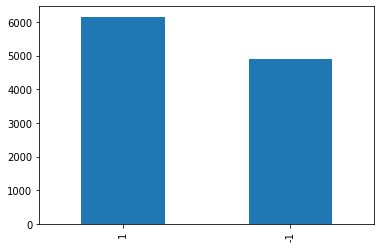

In [11]:
print ('counts')
print (pd.value_counts(data['Result']))
print ()
print ('ratio of classes')
print (pd.value_counts(data['Result'])[1]/pd.value_counts(data['Result'])[-1])
print ()
pd.value_counts(data['Result']).plot.bar()

### Check for counts of different values for each attribute

In [12]:
counts_data_frame = pd.DataFrame()
counts_data_frame['count_of'] = [-1,0,1]
cols = list(data.columns)
for col in cols:
    cnt = data[col].value_counts()
    l = np.zeros(3)
    for val in cnt.index.values:
        l[val+1] = cnt[val]
    counts_data_frame[col] = l

counts_data_frame.set_index('count_of', inplace=True)
counts_data_frame

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count_of,,,,,,,,,,,,,,,,,,,,,
-1,3793.0,8960.0,1444.0,1655.0,1429.0,9590.0,3363.0,3557.0,7389.0,2053.0,...,2137.0,1012.0,5189.0,3443.0,2655.0,8201.0,1539.0,548.0,1550.0,4898.0
0,0.0,135.0,0.0,0.0,0.0,0.0,3622.0,1167.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2569.0,0.0,0.0,6156.0,0.0,0.0
1,7262.0,1960.0,9611.0,9400.0,9626.0,1465.0,4070.0,6331.0,3666.0,9002.0,...,8918.0,10043.0,5866.0,7612.0,5831.0,2854.0,9516.0,4351.0,9505.0,6157.0


### Draw Plots for different values in for each attribute

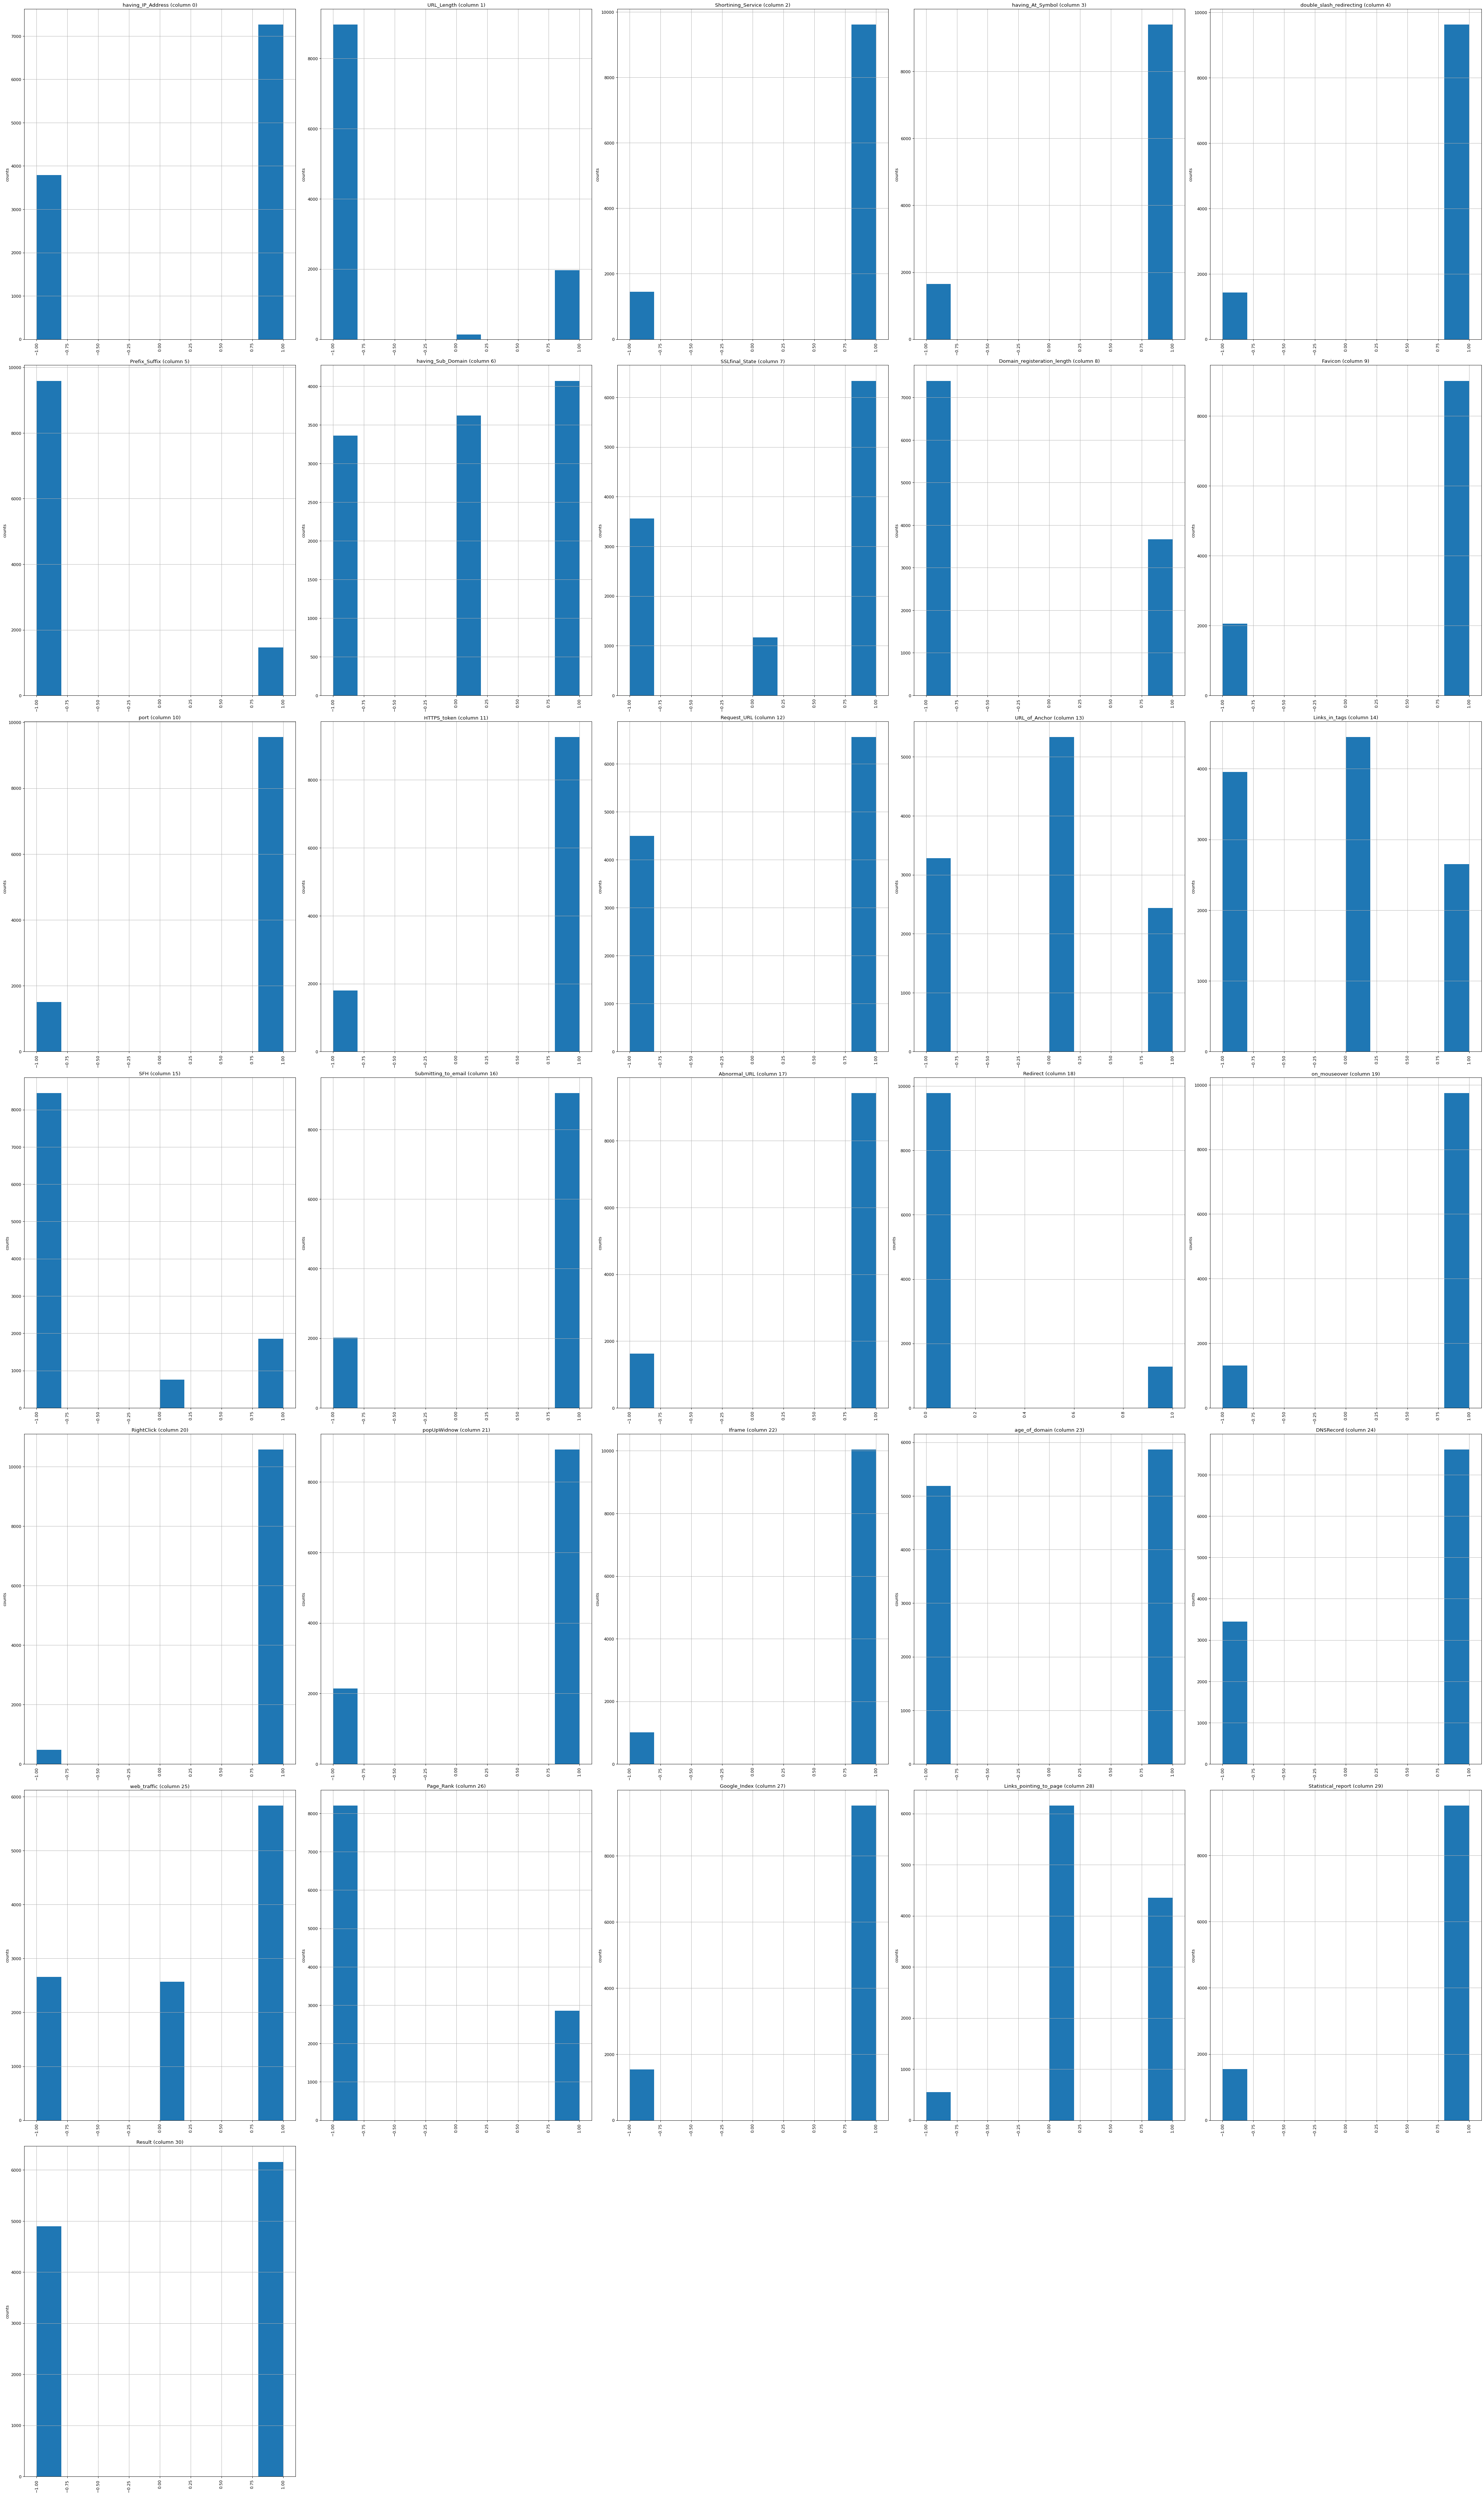

In [13]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(1, figsize = (10 * nGraphPerRow, 12 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(data, 50, 5)

### Distribution of classes per attribute

<Figure size 432x288 with 0 Axes>

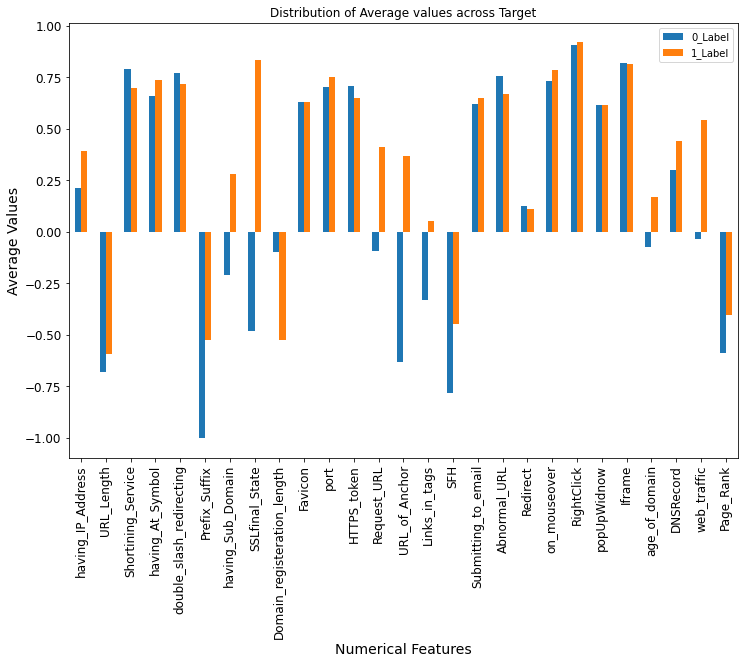

In [14]:
cols = data.columns[:-1]
df_distr =data.groupby('Result')[cols].mean().reset_index().T
df_distr.rename(columns={0:'0_Label',1:"1_Label"}, inplace=True)

plt.figure(2)
plt.rcParams['axes.facecolor']='w'
ax = df_distr[1:-3][['0_Label','1_Label']].plot(kind='bar', title ="Distribution of Average values across Target", figsize=(12, 8), legend=True, fontsize=12)
ax.set_xlabel("Numerical Features", fontsize=14)
ax.set_ylabel("Average Values", fontsize=14)
#ax.set_ylim(0,500000)
plt.show()

### TODO Draw pairplots

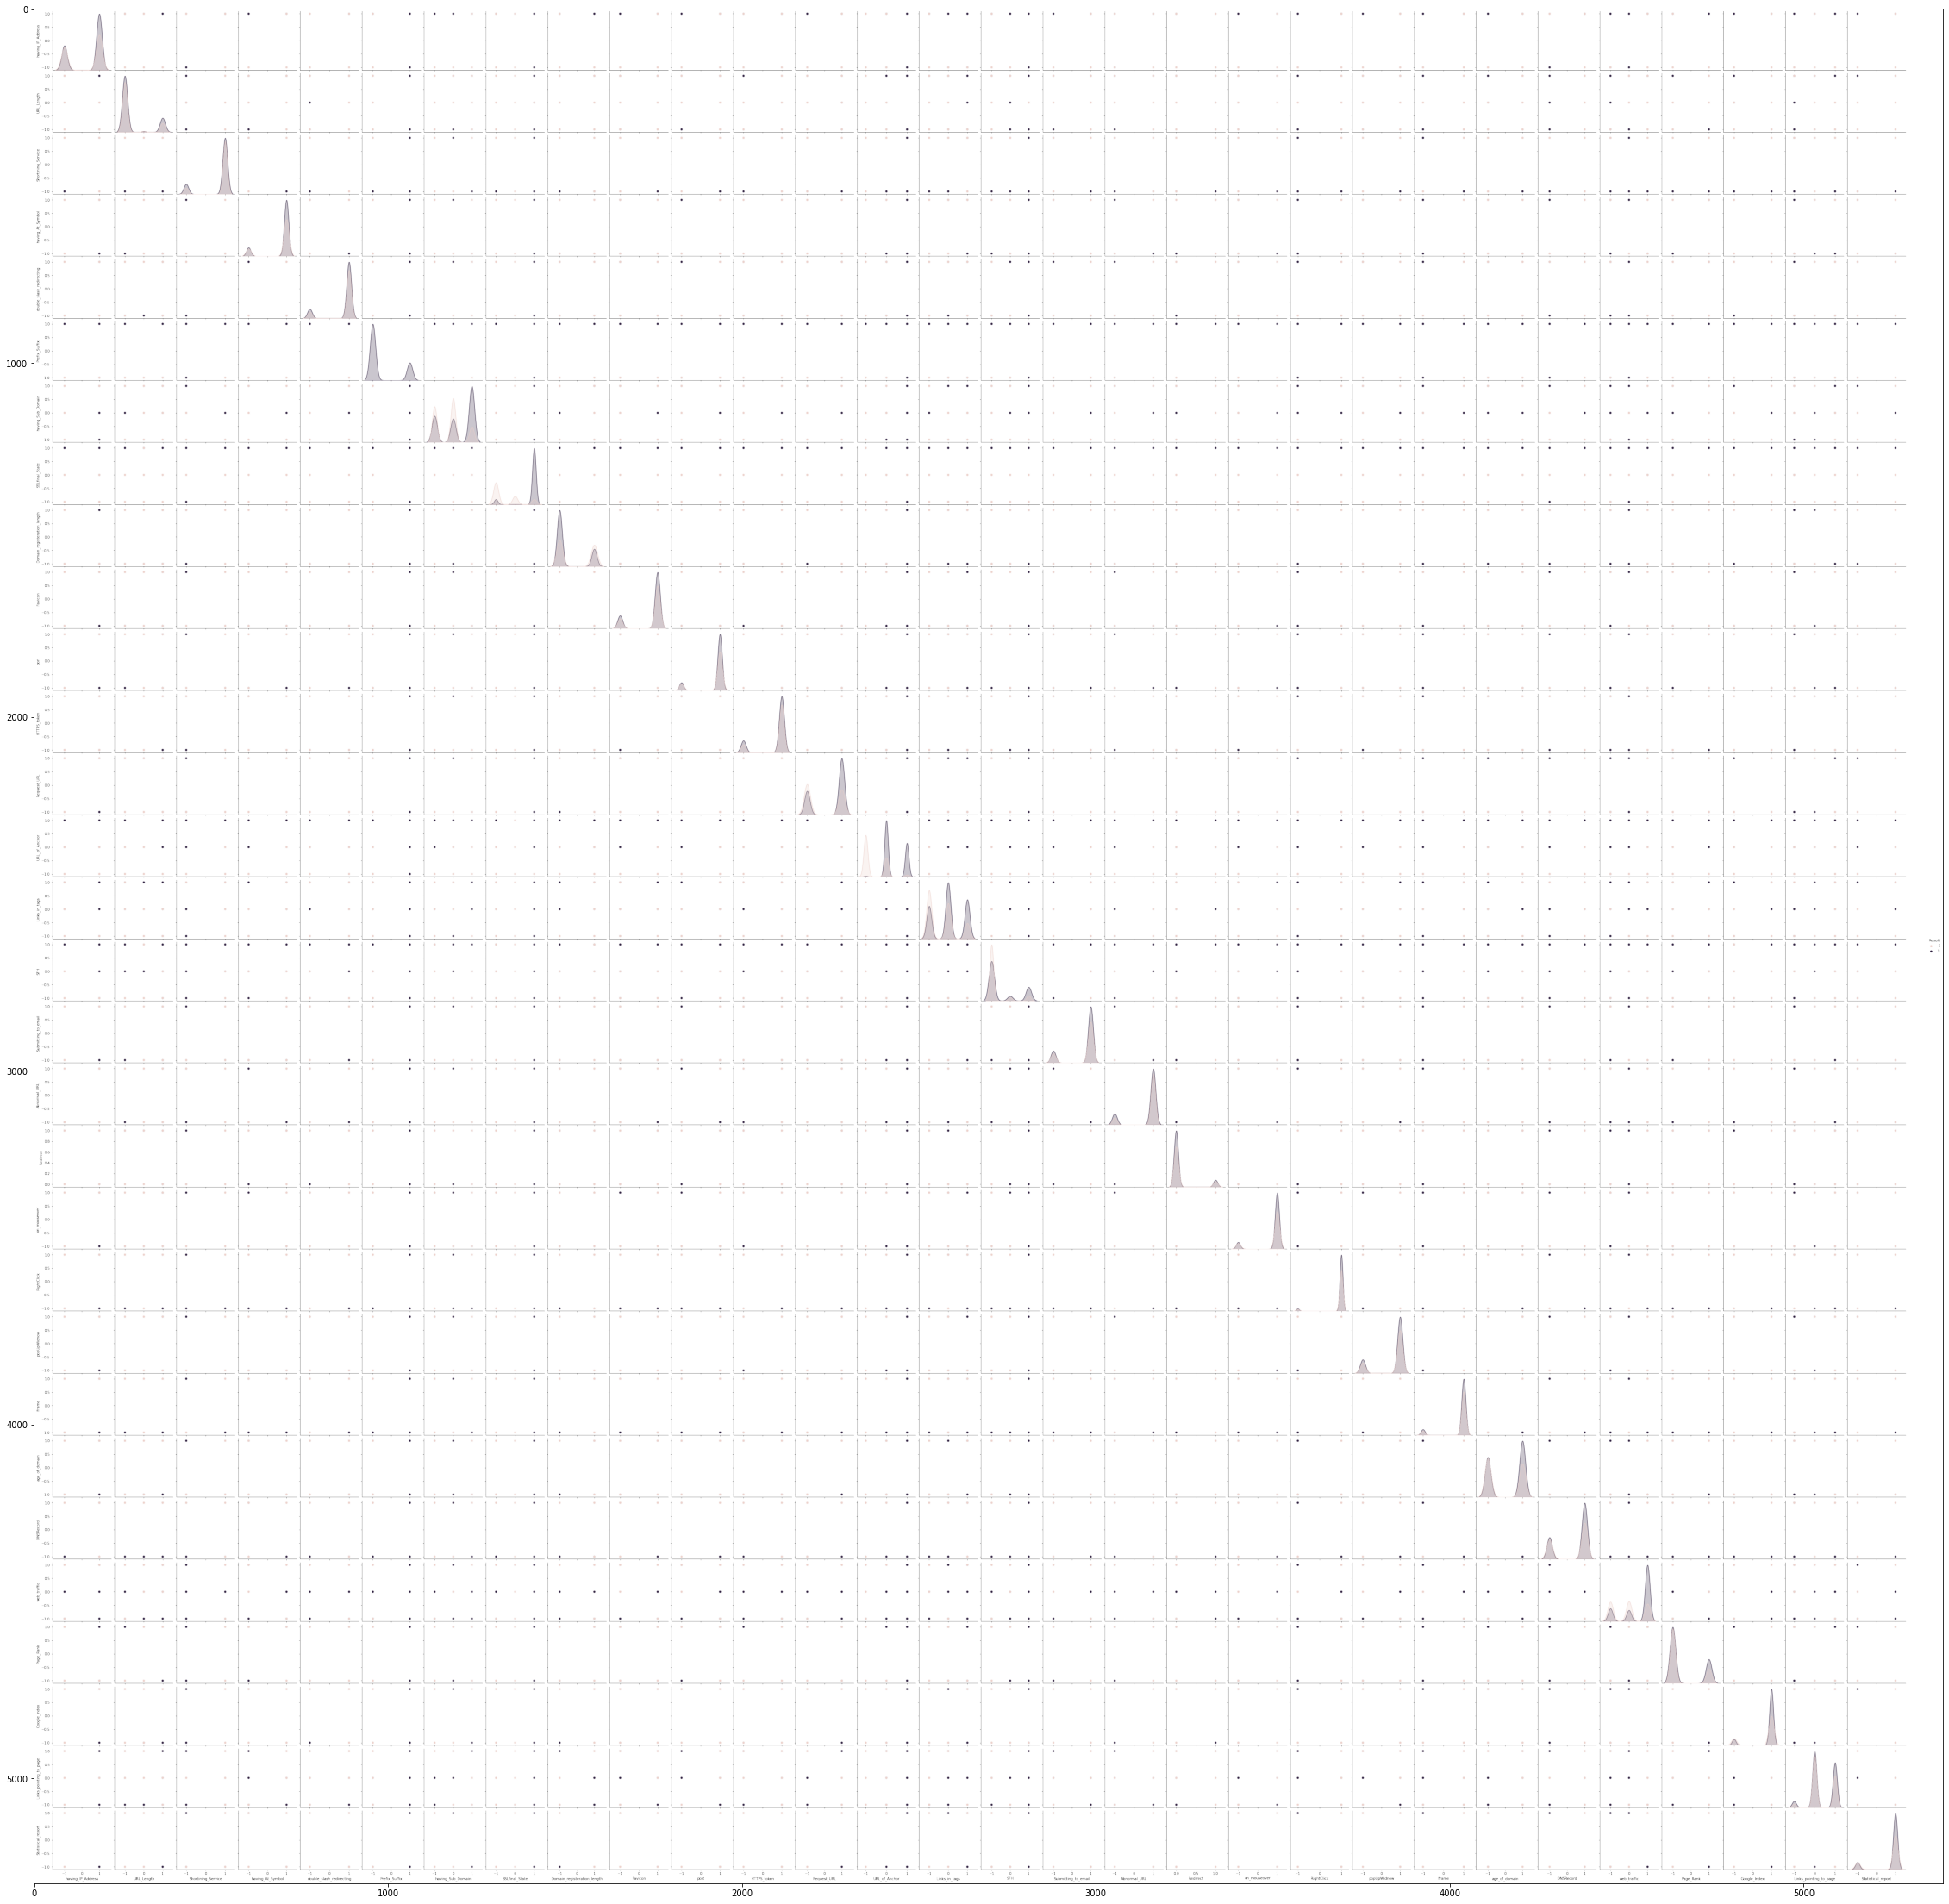

In [15]:
# Pairplot will take a lot of time as 31*30 = 900 plots with 11000 samples. So loading it from AWS after generating it once

# Can be regenerated again using
# sns.pairplot(data, hue="Result")

path_to_pairplot = 'https://d1u36hdvoy9y69.cloudfront.net/cs-235-data-mining/Pair_plot.png'
response = request.urlretrieve(path_to_pairplot, "pairplot.png")

from matplotlib import image
img = image.imread('./pairplot.png')
plt.figure(None,figsize=(40,40))
plt.imshow(img)

## Set data in X and Y

In [16]:
X = np.array(data.drop(columns=['Result']))
Y = np.array(data['Result'])
print (X.shape)
print (Y.shape)

print (np.unique(Y, return_counts=True))
# Update label from -1 to 0 for benign, so that we can use 0/1 step function for prediction in Perceptron
Y[Y == -1] = 0
print(np.unique(Y, return_counts=True))

(11055, 30)
(11055,)
(array([-1,  1], dtype=int64), array([4898, 6157], dtype=int64))
(array([0, 1], dtype=int64), array([4898, 6157], dtype=int64))


### Check for co-relation between different features

<AxesSubplot: >

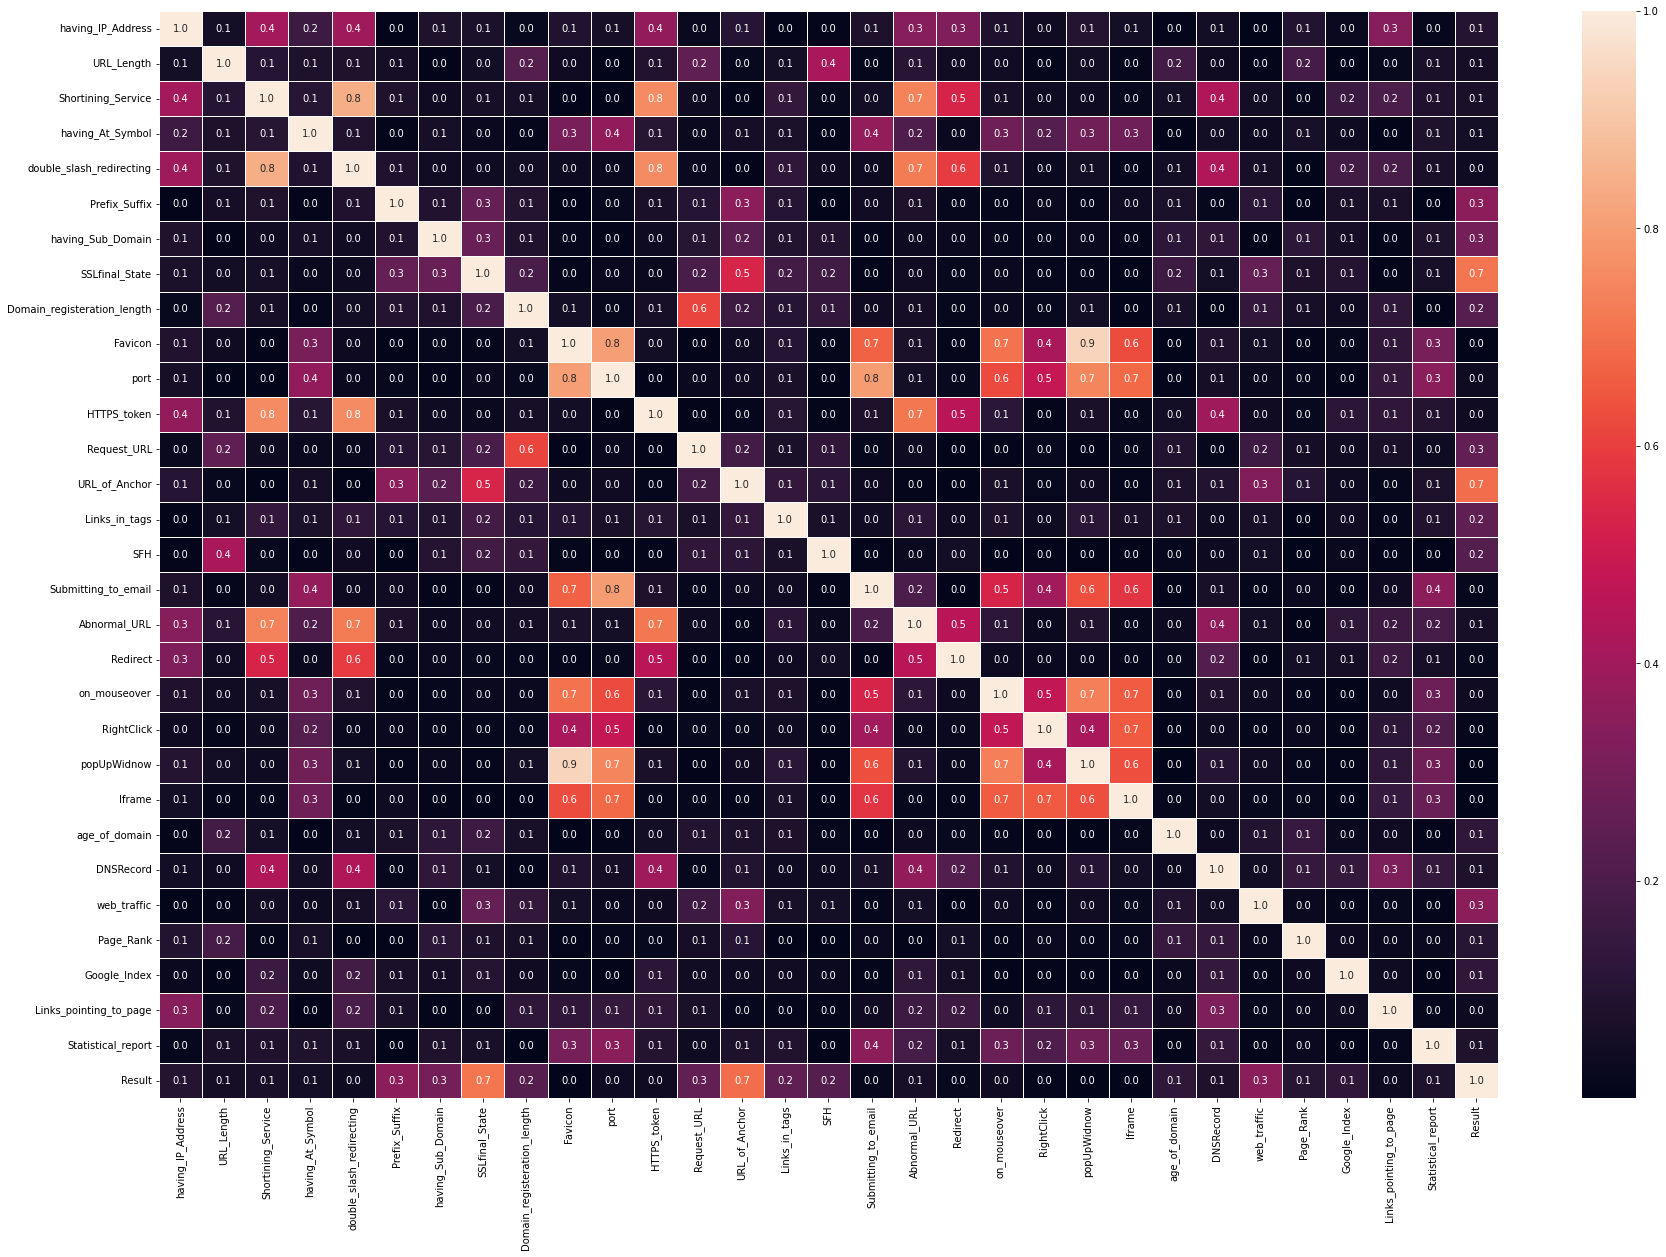

In [17]:
plt.figure(3,figsize=(30, 20))
sns.heatmap(data.corr().abs(),  annot=True, linewidths=.5, fmt= '.1f')

### Using co-relation we can check which features affect the result more than others.

In [18]:
mean_of_corr_for_result = sum(data.corr().abs()['Result'][:-1])/len(data.corr().abs()['Result'][:-1])
cols_with_corr_greater_than_mean = {}

for col in data.corr().abs()['Result'][:-1].index:
    if data.corr().abs()['Result'][:-1][col] > mean_of_corr_for_result:
        cols_with_corr_greater_than_mean[col] = data.corr().abs()['Result'][:-1][col]

for k,v in cols_with_corr_greater_than_mean.items():
  print (k, '-------------->', v)

Prefix_Suffix --------------> 0.34860557031815537
having_Sub_Domain --------------> 0.2983233237700886
SSLfinal_State --------------> 0.7147411951750106
Domain_registeration_length --------------> 0.22578946245861145
Request_URL --------------> 0.25337227167184123
URL_of_Anchor --------------> 0.6929345205555705
Links_in_tags --------------> 0.248228515390874
SFH --------------> 0.22141900810344317
web_traffic --------------> 0.346103108029068


## Attribute Reduction

### PCA

In [19]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3'])
PCA_df = pd.concat([PCA_df, data['Result']], axis = 1)
PCA_df['Result'] = preprocessing.LabelEncoder().fit_transform(PCA_df['Result'])
PCA_df

,PC1,PC2,PC3,Result
0,1.895107,1.663214,2.162380,0
1,-0.376826,1.213438,-0.030034,0
2,0.985732,1.028062,0.607526,0
3,-0.703533,-0.557930,2.040352,0
4,1.002926,0.662556,-0.528757,1
...,...,...,...,...
11050,3.652487,-1.372527,-2.796729,1
11051,3.896655,0.154482,-0.868022,0
11052,-1.225869,-0.024404,-0.808849,0
11053,1.369140,-1.927568,1.118485,0


C:\Users\yg375\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


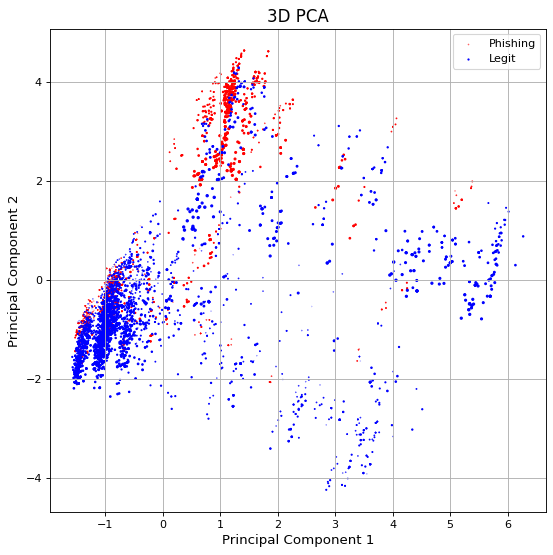

In [20]:
plt.figure(num=4, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['Result'] == clas, 'PC1'], PCA_df.loc[PCA_df['Result'] == clas, 'PC2'], PCA_df.loc[PCA_df['Result'] == clas, 'PC3'],c = color)

plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
# The third axis is the size of points
plt.title('3D PCA', fontsize = 15)
plt.legend(['Phishing', 'Legit'])
plt.grid()

### T-SNE for data

In [21]:
# We want to get TSNE embedding with 3 dimensions only
tsne = TSNE(3, learning_rate='auto', n_iter=300,init='pca',random_state=15)
tsne_result = tsne.fit_transform(X)
print ('Reduced to ', tsne_result.shape,' in ',tsne.n_iter_ , ' iterations')

C:\Users\yg375\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Reduced to  (11055, 3)  in  299  iterations


In [22]:
tsne_result

array([[ 4.2189336 ,  2.1879172 ,  0.29542074],
       [-6.612913  , -1.5500976 , -2.6336515 ],
       [-3.9069982 , -0.10053477,  0.18066473],
       ...,
       [-0.95868236,  5.306034  ,  0.44027388],
       [ 3.77964   , -1.6396784 ,  3.3041613 ],
       [ 2.2903562 , -4.253101  ,  5.1473756 ]], dtype=float32)

In [23]:
phishing_result = tsne_result[Y == 1]
benign_result = tsne_result[Y == 0]

print(phishing_result.shape)
print(benign_result.shape)

(6157, 3)
(4898, 3)


C:\Users\yg375\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 432x288 with 0 Axes>

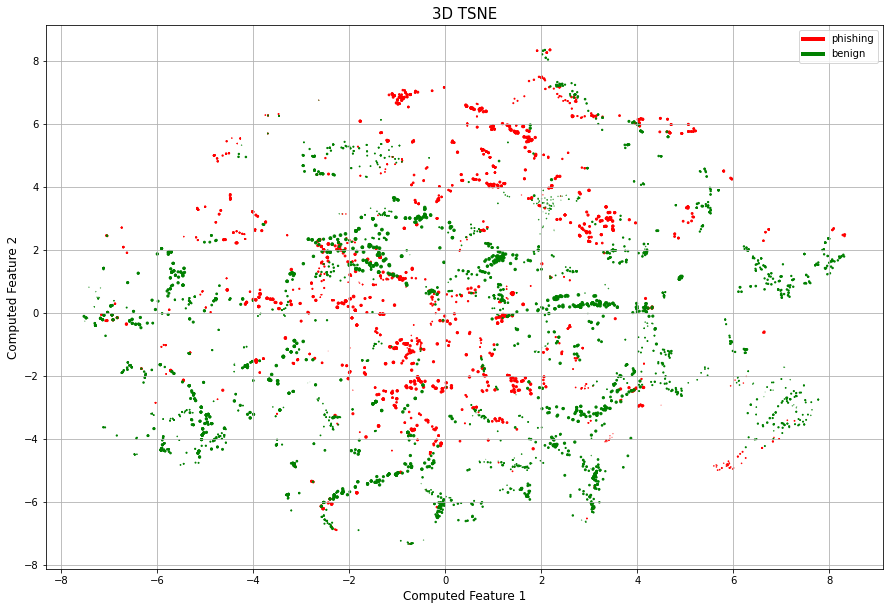

In [24]:
plt.figure(5)
plt.figure(figsize=(15,10))
plt.scatter(phishing_result[:,0], phishing_result[:,1],phishing_result[:,2], color='red',label='phishing')
plt.scatter(benign_result[:,0], benign_result[:,1],benign_result[:,2], color='green', label='benign')
plt.xlabel('Computed Feature 1', fontsize = 12)
plt.ylabel('Computed Feature 2', fontsize = 12)
# The third axis is the size of points
plt.title('3D TSNE', fontsize = 15)

# As the sizes for points is small, they might not be visible in the legend. 
# This is a small hack to draw small line, but nit display them and use the lines to show corrent legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='green', lw=4)]
plt.legend(custom_lines, ['phishing', 'benign'])

plt.grid()
plt.show()

### Recursive Feature Eliminator

In [25]:
X_norm = MinMaxScaler().fit_transform(X)
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(X_norm, Y)
rfe_support = rfe_selector.get_support()
rfe_feature = data.drop(columns=['Result']).loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

Fitting estimator with 30 features.
Fitting estimator with 20 features.
10 selected features
['Shortining_Service', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'web_traffic', 'Google_Index', 'Links_pointing_to_page']


## Prediction Using Perceptron

### Split data in test and train to check

In [26]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3, random_state=20)

print (train_data.shape, train_labels.shape)
print (test_data.shape, test_labels.shape)

(7738, 30) (7738,)
(3317, 30) (3317,)


### Create a Perceptron Class
- From here on, in built perceptron will be refered as perceptron and my implementation will be refered as 'variable'_me, like miss_rate_me, train_me etc.

In [27]:
# Function to predict class based on activated output of perceptron
def pred(X, activation_value = 0):
    y_pred = [1 if i > activation_value else 0 for i in X]
    return y_pred

# Function to predict labels based on given X, W and B
def predict(X,W,B):
    pred_labels = []
    out = np.dot(X, W) + B
    p = pred(out)
    return p

# Function to get accuracy based on predicted and True labels
def acc(Y_pred, Y):
    return np.sum([Y_pred == Y]) / len(Y)

# Perceptron Implementation for 0/1 step activation and 0.001 learning rate
# and gradient descent to update weights.
def Perceptron_2(X, Y, learning_rate = 0.001, max_iters = 300, activation_value=0):
    iter = 0
    W = np.zeros((X.shape[1]))
    B = 0

    for epoch in range(max_iters):
        iter = epoch

        for xi,yi in zip(X,Y):
            yi_out = W.T.dot(xi) + B
            yi_pred = pred([yi_out], activation_value)

            update = learning_rate * (yi - yi_pred)
            W += update*xi
            B += update
    
    return W, B, iter

### Train perceptron in built and my implementation k-fold times to average out the accuracy for Entire Dataset

In [28]:
# Split K into 15 folds.
# We can use k folds on entire dataset as there are no hyperparameters to learn.
# This is to ensure that any split is neither favorable nor unfavourable.
skf = StratifiedKFold(n_splits=15, shuffle=True, random_state=1)
skf.get_n_splits(X, Y)

test_accuracy = []
train_accuracy = []
miss_rate_all = []

test_accuracy_me = []
train_accuracy_me = []
miss_rate_all_me = []

fold_count = 0
for train_index, test_index in skf.split(X, Y):

    print ('fold ->', fold_count)
    
    # Use data from fold 
    train_data, test_data = X[train_index], X[test_index]
    train_labels, test_labels = Y[train_index], Y[test_index]

    # Inbuilt implementation
    p = Perceptron(max_iter=100, tol=1e-7, eta0=1e-5, n_iter_no_change= 20)
    p.fit(train_data, train_labels)
    predictions_train = p.predict(train_data)    
    predictions_test = p.predict(test_data)
    train_score = accuracy_score(predictions_train, train_labels)
    test_score = accuracy_score(predictions_test, test_labels)
    confusion_mat = confusion_matrix(predictions_test, test_labels)
    miss_rate = confusion_mat[0][1] / (confusion_mat[0][0] + confusion_mat[1][0])
    miss_rate_all.append(miss_rate)
    test_accuracy.append(train_score)
    train_accuracy.append(test_score) 
    print ('train accuracy = ', train_score)
    print ('test accuracy = ', test_score)
    print ('miss_rate = ', miss_rate)
    print ('iterations used for inbuilt = ', p.n_iter_)

    # My implementation
    W_me, B_me, iter_me = Perceptron_2(train_data, train_labels, learning_rate = 0.001, max_iters = 100, activation_value = 0)
    predictions_train_me = predict(train_data,W_me,B_me)    
    predictions_test_me = predict(test_data,W_me,B_me)
    train_score_me = acc(predictions_train_me, train_labels)
    test_score_me = acc(predictions_test_me, test_labels)
    confusion_mat_me = confusion_matrix(predictions_test_me, test_labels)
    miss_rate_me = confusion_mat_me[0][1] / (confusion_mat_me[0][0] + confusion_mat_me[1][0])
    miss_rate_all_me.append(miss_rate_me)
    print ('train accuracy for my implementation = ', train_score_me)
    print ('test accuracy for my implementation = ', test_score_me)
    print ('miss_rate for my implementation = ', miss_rate_me)
    print ('iterations used for my implementation = ', iter_me)
    test_accuracy_me.append(train_score_me)
    train_accuracy_me.append(test_score_me) 

    fold_count += 1

    print ()

fold -> 0
train accuracy =  0.8615041674743167
test accuracy =  0.841248303934871
miss_rate =  0.2996941896024465
iterations used for inbuilt =  42
train accuracy for my implementation =  0.8579182012017833
test accuracy for my implementation =  0.8616010854816825
miss_rate for my implementation =  0.12538226299694188
iterations used for my implementation =  99

fold -> 1
train accuracy =  0.8896103896103896
test accuracy =  0.9077340569877883
miss_rate =  0.1743119266055046
iterations used for inbuilt =  26
train accuracy for my implementation =  0.8839891451831751
test accuracy for my implementation =  0.8738127544097694
miss_rate for my implementation =  0.11314984709480122
iterations used for my implementation =  99

fold -> 2
train accuracy =  0.896976158170188
test accuracy =  0.9009497964721845
miss_rate =  0.03669724770642202
iterations used for inbuilt =  21
train accuracy for my implementation =  0.8806939329327389
test accuracy for my implementation =  0.8846675712347354
mis

In [29]:
miss_acc_mean = np.array(miss_rate_all).mean()
miss_acc_mean_me = np.array(miss_rate_all_me).mean()

miss_acc_std = np.std(np.array(miss_rate_all))
miss_acc_std_me = np.std(np.array(miss_rate_all_me))

print (miss_acc_mean,miss_acc_std)
print (miss_acc_mean_me,miss_acc_std_me)

0.13698367135075637 0.07556494951207844
0.11186781986579362 0.03933527212320318


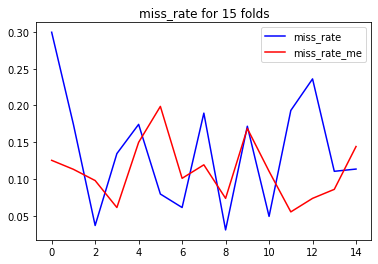

In [30]:
plt.title('miss_rate for 15 folds')
plt.plot(miss_rate_all, 'b', label="miss_rate")
plt.plot(miss_rate_all_me, 'r', label="miss_rate_me")

plt.legend()

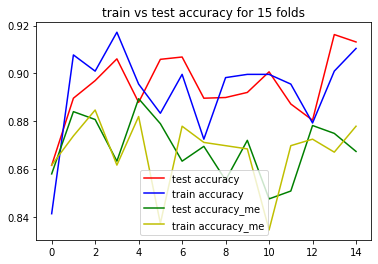

In [31]:
plt.title('train vs test accuracy for 15 folds')

plt.plot(test_accuracy, 'r', label="test accuracy")
plt.plot(train_accuracy, 'b', label = 'train accuracy')

plt.plot(test_accuracy_me, 'g', label="test accuracy_me")
plt.plot(train_accuracy_me, 'y', label = 'train accuracy_me')

plt.legend()

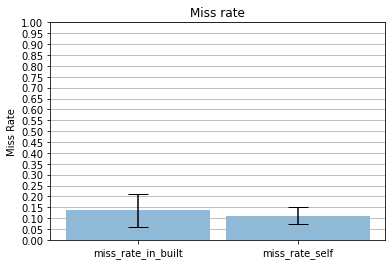

In [32]:
# miss rate bar plots sklearn vs me
inputs = ['miss_rate_in_built', 'miss_rate_self']

miss_rate_mean = np.array(miss_rate_all).mean()
miss_rate_mean_me = np.array(miss_rate_all_me).mean()

miss_rate_std = np.std(np.array(miss_rate_all))
miss_rate_std_me = np.std(np.array(miss_rate_all_me))

means = [miss_rate_mean,miss_rate_mean_me]
stds = [miss_rate_std,miss_rate_std_me]

# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(inputs)), means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.9)
ax.set_ylabel('Miss Rate')
ax.set_xticks(np.arange(len(inputs)))
ax.set_xticklabels(inputs)
ax.set_yticks([i/20 for i in range(21)])
ax.set_title('Miss rate')
ax.yaxis.grid(True)

plt.show()

In [33]:
print (stds)
means

[0.07556494951207844, 0.03933527212320318]


[0.13698367135075637, 0.11186781986579362]

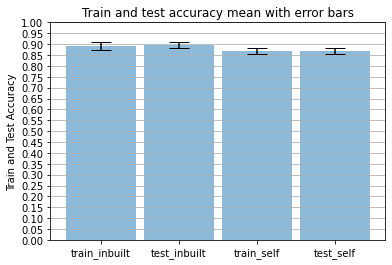

In [34]:
# test train bar plots sklearn vs me
inputs = ['train_inbuilt', 'test_inbuilt', 'train_self', 'test_self']

train_acc_mean = np.array(train_accuracy).mean()
test_acc_mean = np.array(test_accuracy).mean()

train_acc_mean_me = np.array(train_accuracy_me).mean()
test_acc_mean_me = np.array(test_accuracy_me).mean()

train_acc_std = np.std(np.array(train_accuracy))
test_acc_std = np.std(np.array(test_accuracy))

train_acc_std_me = np.std(np.array(train_accuracy_me))
test_acc_std_me = np.std(np.array(test_accuracy_me))

means = [train_acc_mean, test_acc_mean, train_acc_mean_me, test_acc_mean_me]
stds = [train_acc_std, test_acc_std, train_acc_std_me, test_acc_std_me]

# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(inputs)), means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.9)
ax.set_ylabel('Train and Test Accuracy')
ax.set_xticks(np.arange(len(inputs)))
ax.set_xticklabels(inputs)
ax.set_yticks([i/20 for i in range(21)])
ax.set_title('Train and test accuracy mean with error bars')
ax.yaxis.grid(True)

plt.show()

In [35]:
print (means)
print (stds)

[0.8934418815015829, 0.8949344188150159, 0.8672998643147898, 0.8688505524326421]
[0.017862871906644432, 0.013515271630662061, 0.013874434769242038, 0.012060027597221303]


### Confusion Matrix

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      1070
           1       0.99      0.82      0.90      2247

    accuracy                           0.87      3317
   macro avg       0.85      0.90      0.86      3317
weighted avg       0.90      0.87      0.87      3317



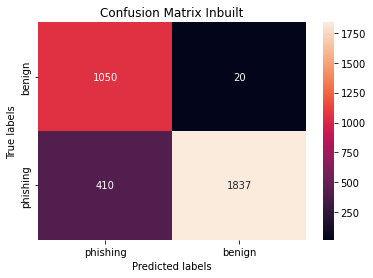

In [36]:
# After running on k folds and averaging out the results, we would like to look more closely on only 1 fold and look at what kind on confusion matrix we are getting and what is our classification metrices

# Confusion matrix for sklearn implementation

train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3, random_state=17)

p = Perceptron()
p.fit(train_data, train_labels)
predictions_train = p.predict(train_data)
predictions_test = p.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
test_score = accuracy_score(predictions_test, test_labels)
classification_repo = classification_report(predictions_test, test_labels)
confusion_mat = confusion_matrix(predictions_test, test_labels)
ax= plt.subplot()
cm = confusion_matrix(predictions_test, test_labels)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Inbuilt'); 
ax.xaxis.set_ticklabels(['phishing', 'benign']); ax.yaxis.set_ticklabels(['benign', 'phishing']);
print(classification_repo)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1350
           1       0.95      0.90      0.92      1967

    accuracy                           0.91      3317
   macro avg       0.90      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



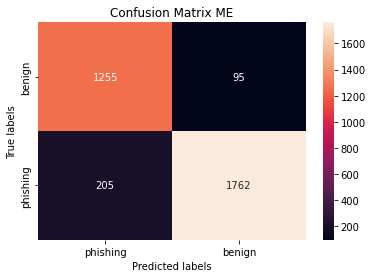

In [37]:
# Confusion matrix for self implementation
W_me, B_me, iter_me = Perceptron_2(train_data, train_labels, learning_rate = 0.001, max_iters = 500, activation_value = 0)
predictions_train_me = predict(train_data,W_me,B_me)
predictions_test_me = predict(test_data,W_me,B_me)
train_score_me = acc(predictions_train_me, train_labels)
test_score_me = acc(predictions_test_me, test_labels)
classification_repo_me = classification_report(predictions_test_me, test_labels)
confusion_mat_me = confusion_matrix(predictions_test_me, test_labels)

ax= plt.subplot()
cm = confusion_matrix(predictions_test_me, test_labels)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix ME'); 
ax.xaxis.set_ticklabels(['phishing', 'benign']); ax.yaxis.set_ticklabels(['benign', 'phishing']);
print(classification_repo_me)

### As our model is to detect phishing websites and the number of phishing websites is far less than benign websites, we will focus on miss rate or false nevative rate.

miss_rate = FN / (FN + TP)

In [38]:
miss_rate = confusion_mat[0][1] / (confusion_mat[0][0] + confusion_mat[1][0])
print ('miss_rate', miss_rate)

miss_rate_me = confusion_mat_me[0][1] / (confusion_mat_me[0][0] + confusion_mat_me[1][0])
print ('miss_rate_me', miss_rate_me)

miss_rate 0.0136986301369863
miss_rate_me 0.06506849315068493
